# Import necessary Packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Magic command to print many statements

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Read the input file

In [3]:
data=pd.read_csv("C://Suresha/Reva/Trimester 1/Python/RP_class/29June2019/Telco.csv", sep=',')

In [4]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.9,29.90,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57.0,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.9,108.20,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.80,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.70,Yes
5,Female,0.0,No,No,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.7,820.50,Yes
6,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.40,No
7,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.8,301.90,No
8,Female,0.0,Yes,No,28.0,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.10,Yes
9,Male,0.0,No,Yes,62.0,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.2,3488.00,No


# understand the features , missing values,type of characters,percentile, mean, std, Quartiles, min, max

In [5]:
data.head()
data.tail()
data.info()
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.9,29.90,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57.0,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.9,108.20,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.80,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.70,Yes


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.50,No
7039,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.90,No
7040,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.50,No
7041,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.60,Yes
7042,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.7,6844.50,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(3), object(17)
memory usage: 1.1+ MB


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.786724
std,0.368612,24.559481,30.089772
min,0.000000,0.000000,18.300000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.800000


# Exploratory data analytics

In [6]:
eda_report=pandas_profiling.ProfileReport(data)
eda_report.to_file("Telco_EDA_report.html")

In [7]:
pwd()

'C:\\Users\\hpsur'

In [8]:
data.shape
type(data)
data.size
data.head()
data.tail()

(7043, 20)

pandas.core.frame.DataFrame

140860

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.9,29.90,No
1,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,57.0,1889.50,No
2,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.9,108.20,Yes
3,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.80,No
4,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.70,Yes


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.50,No
7039,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.90,No
7040,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.50,No
7041,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.60,Yes
7042,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.7,6844.50,No


# Checking Missing Values

In [9]:
pd.isnull(data).any()
pd.isnull(data).sum()
data.info()
data.describe()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(3), object(17)
memory usage: 1.1+ MB


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.786724
std,0.368612,24.559481,30.089772
min,0.000000,0.000000,18.300000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.800000


# checking "Churn" counts

In [10]:
print('Counts of Labels')
data.groupby("Churn").size()

Counts of Labels


Churn
No     5174
Yes    1869
dtype: int64

# Converting Object to Categorical

In [11]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col]=pd.Categorical(data[col]).codes

In [12]:
data.head()
data.info()
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.9,2371,0
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,57.0,1398,0
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.9,145,1
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.3,1333,0
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.7,887,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int8
SeniorCitizen       7043 non-null float64
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null float64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null int16
Churn               7043 non-null int8
dtypes: float64(3), int16(1), int8(16)
memory usage: 289.0 KB


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.786724,3103.954991,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.089772,1805.510501,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.300000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1528.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,3089.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,4681.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.800000,6227.000000,1.000000


# Correlation matrix, Heat map,

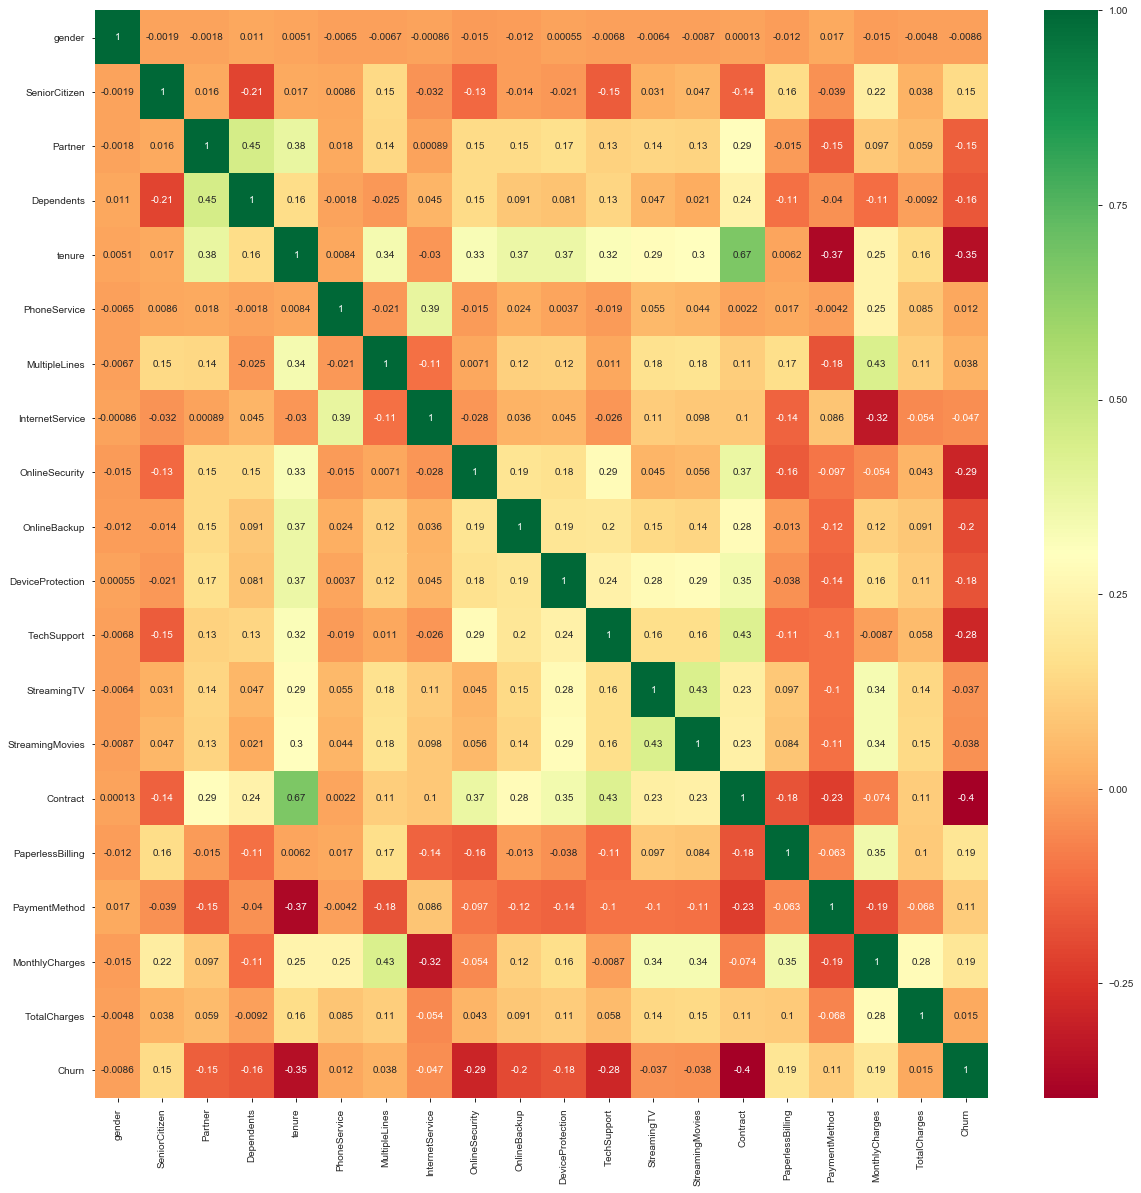

In [23]:
x=data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

# segregate data X and Y 

In [25]:
y=data.Churn
x=data.drop('Churn',axis=1)
y.head()
x.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.9,2371
1,1,0.0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,57.0,1398
2,1,0.0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.9,145
3,1,0.0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.3,1333
4,0,0.0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.7,887


# Split  train 85% and test 15%

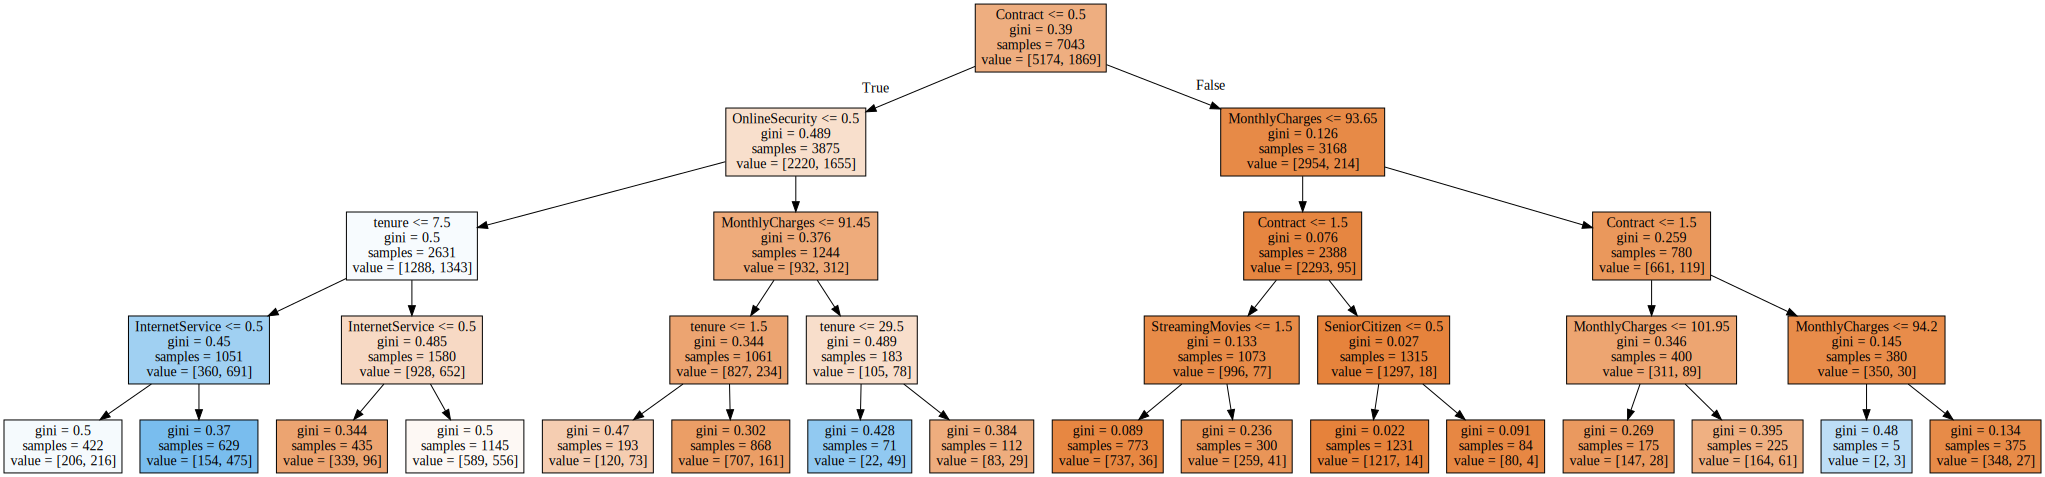

In [39]:
import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(x,y)
with open('tree.dot','w') as dotfile:
    tree.export_graphviz(clf,out_file=dotfile,feature_names=x.columns,filled=True)
    dotfile.close()
    
from graphviz import Source
with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [41]:
from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(max_depth=4)
my_tree_one
my_tree_one = my_tree_one.fit(x_train, y_train)
predicted = my_tree_one.predict(x_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
metrics.accuracy_score(predicted, y_test)

0.7795648060548723

In [43]:
my_tree_one.feature_importances_
x.columns
features = pd.DataFrame(my_tree_one.feature_importances_,x.columns)
features
features.columns = ["Importance"]
features

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.34413546e-01, 0.00000000e+00, 0.00000000e+00, 8.46397791e-02,
       1.46214937e-01, 0.00000000e+00, 0.00000000e+00, 1.69594144e-04,
       0.00000000e+00, 4.84208409e-03, 5.82864466e-01, 0.00000000e+00,
       0.00000000e+00, 4.35495065e-02, 3.30608717e-03])

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

,0
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.134414
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.084640
OnlineSecurity,0.146215
OnlineBackup,0.000000


,Importance
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.134414
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.084640
OnlineSecurity,0.146215
OnlineBackup,0.000000


In [44]:
#Decision Tree Hyperparameters optimization using cross-validation 
criterion=['gini','entropy']
min_samples_split=[2,10,20,50,100]
max_depth=[20,30,None]

In [45]:
param_grid={'criterion':criterion, 'min_samples_split':min_samples_split,'max_depth':max_depth}
dt_g=GridSearchCV(my_tree_one, param_grid, cv=5,verbose = 2,n_jobs=-1)
dt_g.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 50, 100], 'max_depth': [20, 30, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

# Confusion Matrix

In [22]:
plt.figure(figsize=(8,4))
print('Confusion Matrix')
cf = metrics.confusion_matrix(predicted, y_train)
lbl1=["P1", "P2", "P3"]
lbl2 = ["T1", "T2", "T3"]
sns.heatmap(cf,annot=True,cmap ="BrBG_r", fmt="d", xticklabels=lbl1,yticklabels=lbl2)
plt.show()

<Figure size 576x288 with 0 Axes>

Confusion Matrix


ValueError: Found input variables with inconsistent numbers of samples: [1057, 5986]

<Figure size 576x288 with 0 Axes>

In [ ]:
dt_g.best_estimator_

In [ ]:
dt_g.best_score_

In [ ]:
dt_g.best_index_

In [ ]:
cv=pd.DataFrame(dt_g.cv_results_)
cv

In [ ]:
import csv
cv.to_csv("TelcoChurn.CSV")